* NAME: RISHABH PATIL
* SAP: 60009200056
* BATCH: K2

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [ ]:
data = pd.read_csv("food_truck_data.txt")
data = data.rename(columns={"Population":"x", "Profit":"y"})
data.head()


,x,y
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


Text(0, 0.5, 'Profit')

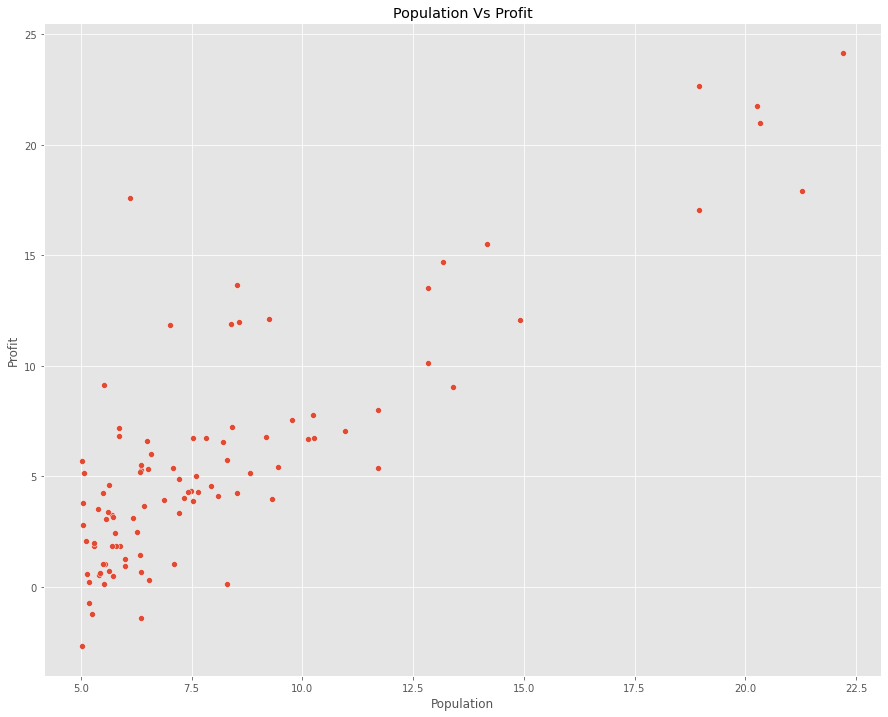

In [ ]:
ax = sns.scatterplot(x = "x", y = "y", data = data)
ax.set_title("Population Vs Profit")
plt.xlabel("Population")
plt.ylabel("Profit")

In [ ]:
def y_pred(theta,x):
    return(theta[0] + theta[1]*x)

def cost_fn(theta, data):
    n = len(data)
    x = data.x
    y = data.y
    error = np.sum((y - y_pred(theta, x))**2)
    return(error/(2*n))
print(f"The Value of J at theta0 = 0 and theta1 = 0 is {cost_fn([0,0], data)}")

The Value of J at theta0 = 0 and theta1 = 0 is 32.072733877455676


In [ ]:
def gradient_descent(data, alpha = 0.01, ep = 0.00001, max_iter=2000, power = 2):
    n = len(data)
    x = data.x
    y = data.y
    theta = np.zeros((power,))
    costs = [cost_fn(theta, data)]
    j = costs[-1]
    for _ in range(max_iter):
        ypred = y_pred(theta, x)
        for i in range(len(theta)):
            theta[i] -= alpha/n*np.sum((ypred-y)*(x**i))
        costs.append(cost_fn(theta, data))
        e = costs[-1]

    return(theta, costs)

In [ ]:
theta, costs = gradient_descent(data, max_iter = 2000,power=2)
print(theta)

[-3.78806857  1.18221277]


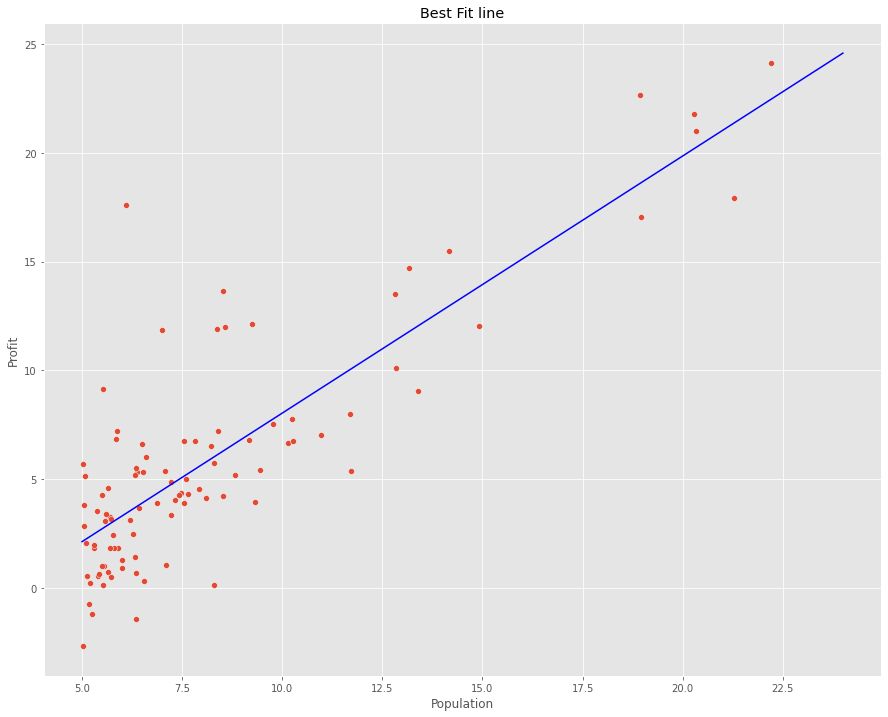

In [ ]:
ax = sns.scatterplot(x = "x", y = "y", data = data)
ax.set_title("Population Vs Profit")
x_value = [x for x in range(5, 25)]
y_value = [(x * theta[1] + theta[0]) for x in x_value]
sns.lineplot(x_value, y_value, color = "blue")

plt.xlabel("Population")
plt.ylabel("Profit")
plt.title("Best Fit line");

# **Synthetic Data using a mathematical function. (u can use sin wave)**

In [ ]:
x = np.array([i*np.pi/180 for i in range(60,300,4)])
np.random.seed(9)
y = np.sin(x) + np.arange(0,0.15,len(x))
data = pd.DataFrame({"x" : x, "y" : y})

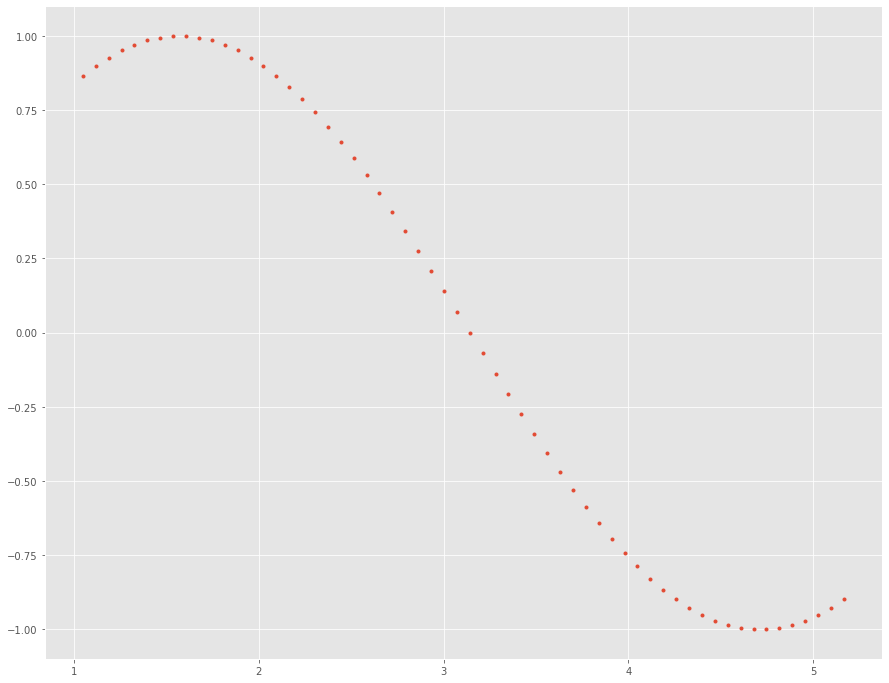

In [ ]:
plt.plot(data['x'],data['y'],'.')

In [ ]:
theta, costs = gradient_descent(data, max_iter = 2000, power = 3)

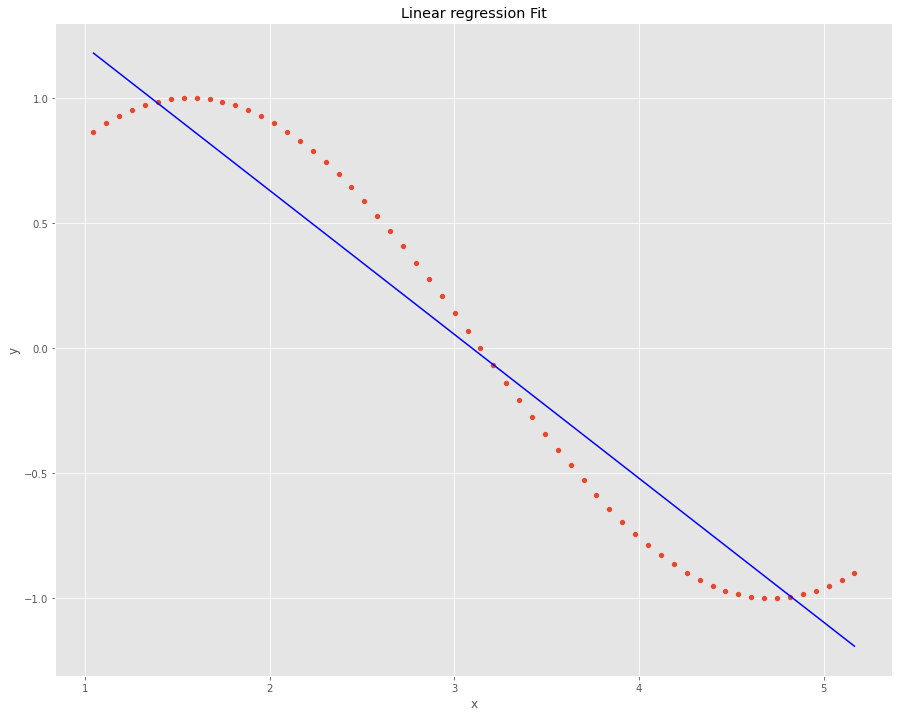

In [ ]:
ax = sns.scatterplot(x = "x", y = "y", data = data)
x_value = data.x
y_value = y_pred(theta, x_value)
plt.plot(x_value, y_value, color = "blue")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear regression Fit");

In [ ]:
#Use python libraries to perform linear regression, ridge and lasso regressionon Dataset 1

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import math
plt.style.use('ggplot')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 12
from warnings import simplefilter
from sklearn.exceptions import *
simplefilter(action='ignore', category=FutureWarning)
simplefilter(action='ignore', category=ConvergenceWarning)

          x         y       x_2       x_3       x_4       x_5       x_6  \
0  1.047198  1.065763  1.096623  1.148381  1.202581  1.259340  1.318778   
1  1.117011  1.006086  1.247713  1.393709  1.556788  1.738948  1.942424   
2  1.186824  0.695374  1.408551  1.671702  1.984016  2.354677  2.794587   
3  1.256637  0.949799  1.579137  1.984402  2.493673  3.133642  3.937850   
4  1.326450  1.063496  1.759470  2.333850  3.095735  4.106339  5.446854   

        x_7       x_8        x_9       x_10       x_11       x_12       x_13  \
0  1.381021  1.446202   1.514459   1.585938   1.660790   1.739176   1.821260   
1  2.169709  2.423588   2.707173   3.023942   3.377775   3.773011   4.214494   
2  3.316683  3.936319   4.671717   5.544505   6.580351   7.809718   9.268760   
3  4.948448  6.218404   7.814277   9.819710  12.339811  15.506664  19.486248   
4  7.224981  9.583578  12.712139  16.862020  22.366630  29.668222  39.353420   

        x_14       x_15  
0   1.907219   1.997235  
1   4.707635   5

Text(0.5, 1.0, 'X vs Y')

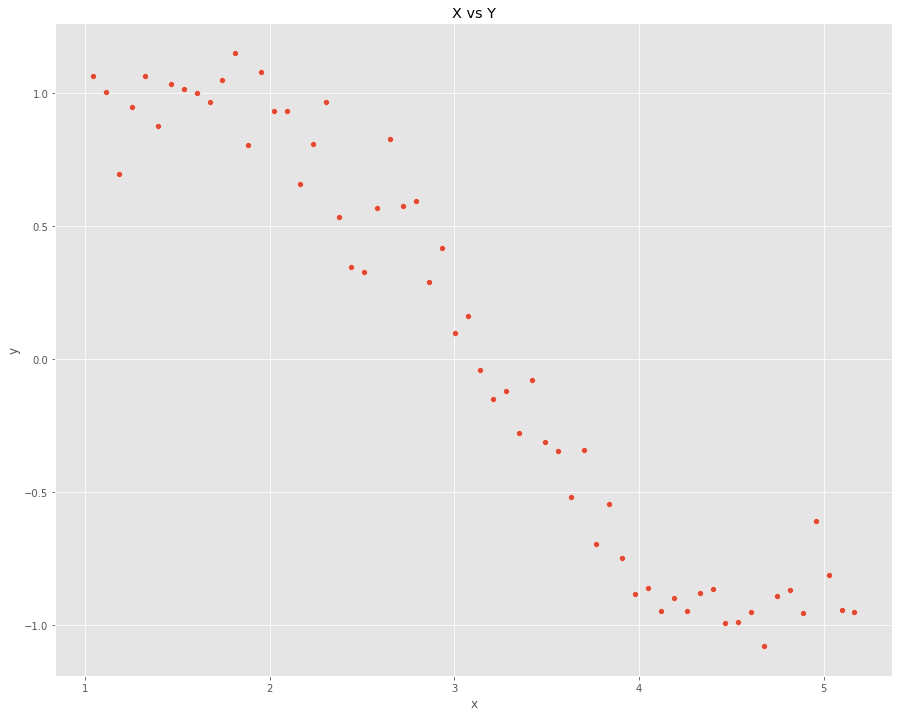

In [ ]:
x = np.array([i*np.pi/180 for i in range(60,300,4)])
np.random.seed(10)
y = np.sin(x) + np.random.normal(0,0.15,len(x))
data1 = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])
for i in range(2,16):
    colname = 'x_%d'%i
    data1[colname] = data1['x']**i
print(data1.head())
ax = sns.scatterplot(x = "x", y = "y", data = data1)
ax.set_title("X vs Y")

In [ ]:
def mean_square(y, y_hat):
    n = len(y)
    return(np.sqrt(np.sum((y_hat - y)**2)/n))

In [ ]:
def linreg_rmse(data, power = 2):
    predictors=['x']
    if power>=2:
        predictors.extend(['x_%d'%i for i in range(2,power+1)])
    linreg = LinearRegression()
    linreg.fit(data[predictors],data['y'])
    y_hat = linreg.predict(data[predictors])

    models_to_plot = {1:231,3:232,6:233,9:234,12:235,15:236}
    if power in models_to_plot:
        plt.subplot(models_to_plot[power])
        plt.tight_layout()
        plt.plot(data['x'],y_hat)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Linear Regression Plot for power = %d'%power)

    return(mean_square(y, y_hat))

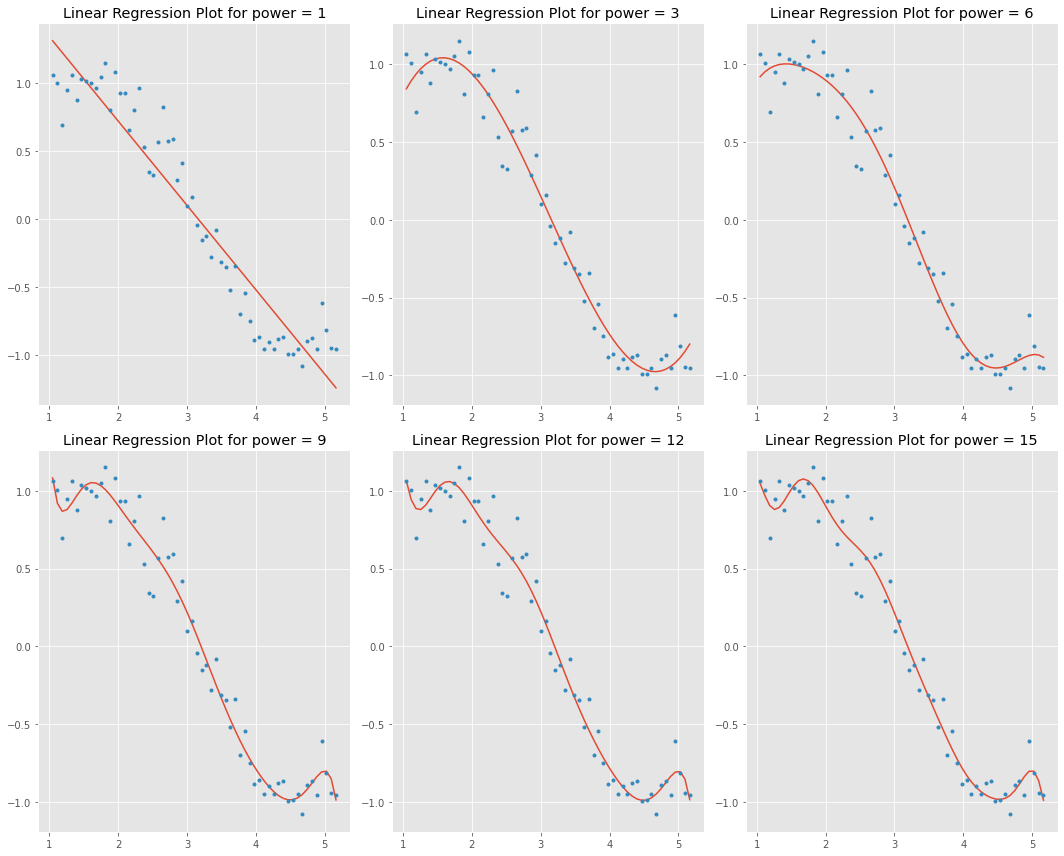

In [ ]:
linreg_errors = []
for i in range(16):
    linreg_errors.append(linreg_rmse(data1, power = i))

In [ ]:
def ridge_rmse(data, alpha):
    predictors=['x']
    predictors.extend(['x_%d'%i for i in range(2,16)])
    x = data[predictors]
    y = data["y"]
    rr = Ridge(alpha=alpha,normalize=True)
    rr.fit(x, y)
    y_hat = rr.predict(x)

    models_to_plot = {1e-15:231, 1e-10:232, 1e-4:233, 1e-3:234, 1e-2:235, 5:236}
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_hat)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Ridge Regression Plot for alpha = %.3g'%alpha)

    return(mean_square(y, y_hat))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=4.03691e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


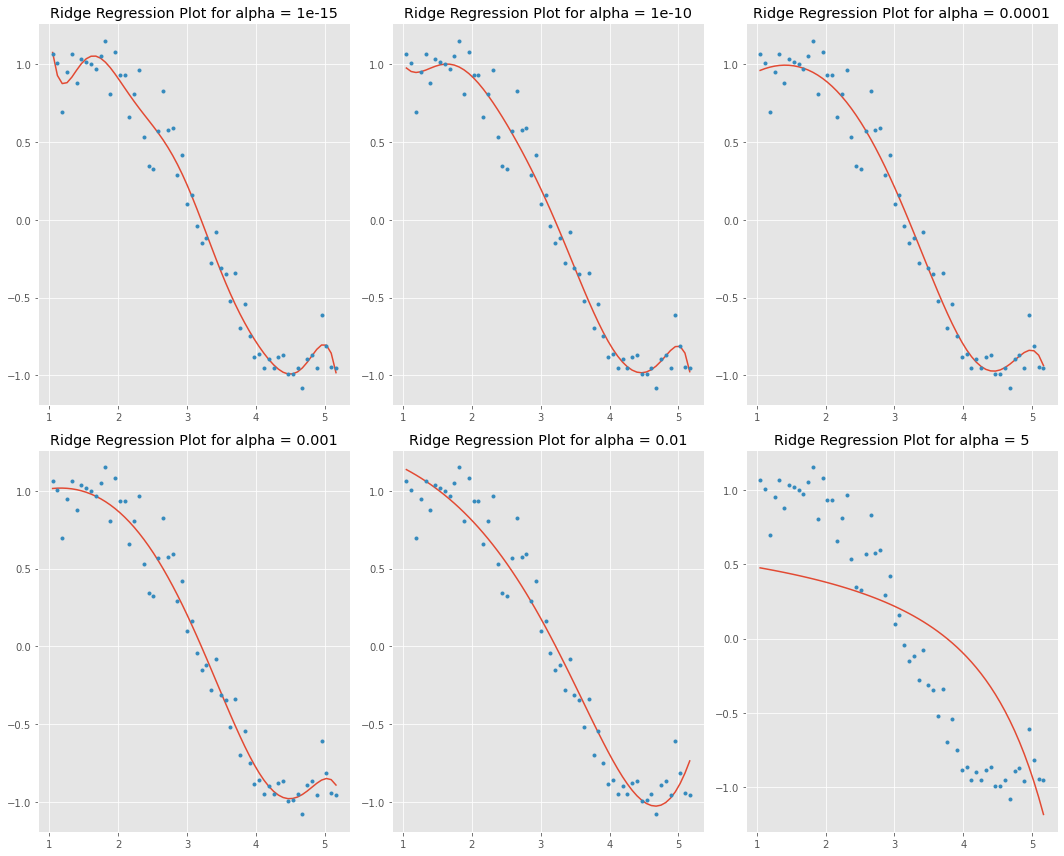

In [ ]:
ridge_errors=[]
alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]
for i in alpha_ridge:
    ridge_errors.append(ridge_rmse(data1, i))

In [ ]:
def lasso_rmse(data, alpha):
    predictors=['x']
    predictors.extend(['x_%d'%i for i in range(2,16)])
    x = data[predictors]
    ls = Lasso(alpha=alpha, normalize = True)
    ls.fit(x, y)
    y_hat = ls.predict(x)

    models_to_plot = {1e-10:231, 1e-5:232,1e-4:233, 1e-3:234, 1e-2:235, 1:236}
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_hat)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Lasso Regression Plot for alpha = %.3g'%alpha)

    return(mean_square(y, y_hat))

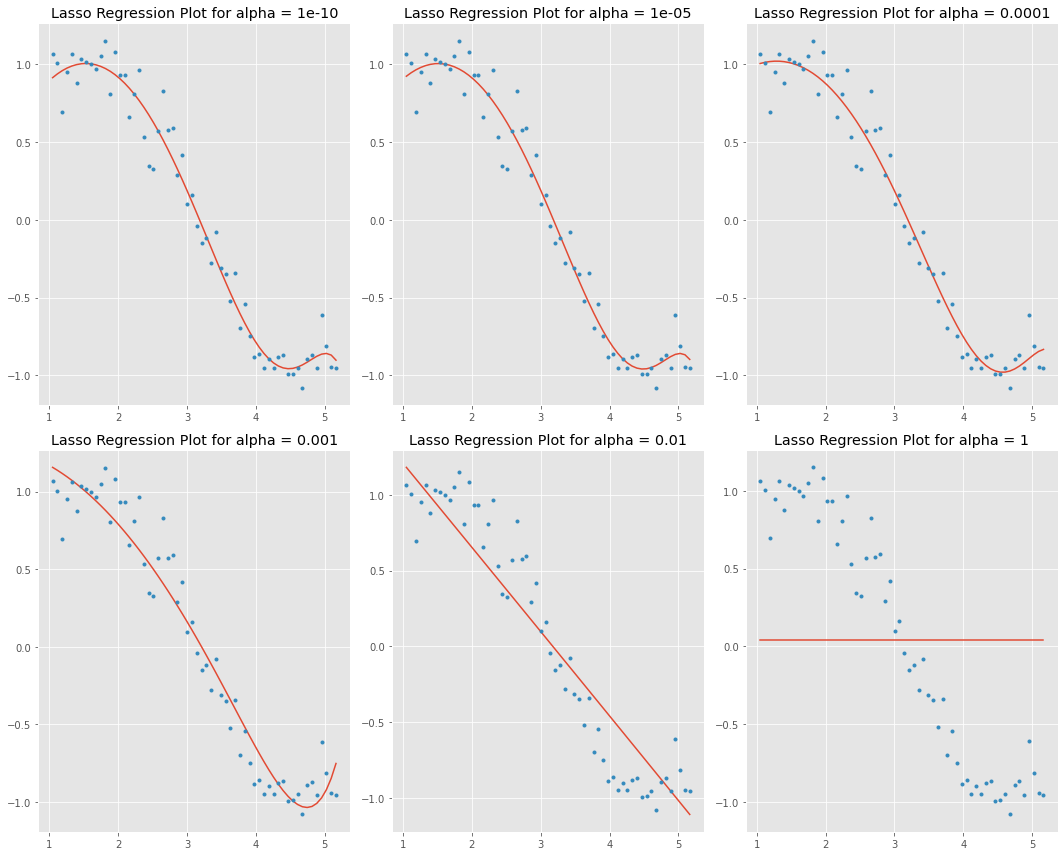

In [ ]:
lasso_errors=[]
alpha_lasso = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]
for i in alpha_lasso:
    lasso_errors.append(lasso_rmse(data1, i))